# Lorenz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [ ]:
def prepare_dataset(rho):
  nn_input = np.zeros((number_of_datasets*(len(t)-1),3))
  nn_output = np.zeros_like(nn_input)

  def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

  #x0 = -15 + 30 * 0.6 * np.ones((number_of_datasets, 3)) 
  x0 = np.random.random((number_of_datasets, 3))

  x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])
  
  for j in range(number_of_datasets):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T


  return nn_input, nn_output


In [ ]:
## Simulate the Lorenz System rho = 10, 28, 35
np.random.seed(123)
dt = 0.1
T = 50
t = np.arange(0, T+dt, dt)
beta = 8/3
sigma = 10
number_of_datasets = 40

rho = 10
nn_in_10, nn_out_10 = prepare_dataset(rho)
nn_in_10 = nn_in_10 
nn_in_10 = np.concatenate((nn_in_10,np.ones((len(nn_in_10),1))*rho),axis=1)
nn_out_10 = nn_out_10 

rho = 28
nn_in_28, nn_out_28 = prepare_dataset(rho)
nn_in_28 = nn_in_28 
nn_in_28 = np.concatenate((nn_in_28,np.ones((len(nn_in_28),1))*rho),axis=1)
nn_out_28 = nn_out_28 

rho = 35
nn_in_35, nn_out_35 = prepare_dataset(rho)
nn_in_35 = nn_in_35 
nn_in_35 = np.concatenate((nn_in_35,np.ones((len(nn_in_35),1))*rho),axis=1)
nn_out_35 = nn_out_35 


nn_input = np.concatenate((nn_in_10,nn_in_28,nn_in_35),axis=0)
nn_output = np.concatenate((nn_out_10, nn_out_28, nn_out_35), axis = 0)


In [ ]:
deep_approx = tf.keras.keras.models.Sequential()
deep_approx.add(tf.keras.layers.Dense(100, input_dim=4, activation='relu'))
deep_approx.add(tf.keras.layers.Dense(100, activation='relu'))
deep_approx.add(tf.keras.layers.Dense(3, activation='linear'))

decayRate = 1e-4
nrSamplesPostValid = 2
learningRate = 1e-3
nEpochs = 500
batchSize = 128
verbosity = 1

adam = tf.keras.optimizers.Adam( learning_rate = learningRate, decay = decayRate )
# Compile model
deep_approx.compile(loss='mse', optimizer=adam)

# Fit!
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
History = deep_approx.fit(nn_input, nn_output, epochs=nEpochs )


Epoch 1/500
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2394
Epoch 2/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2941
Epoch 3/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2122
Epoch 4/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1644
Epoch 5/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1276
Epoch 6/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1041
Epoch 7/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0835
Epoch 8/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0672
Epoch 9/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0548
Epoch 10/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0445
Epoch 11/500
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356
Epoch 12/500
1875/1875 [==============================] - 3s 2ms/step - lo

KeyboardInterrupt: ignored

In [ ]:
rho = 40
np.random.seed(139)
num_traj = 100

nn_flow = np.zeros((num_traj, len(t), 4))
#nn_flow[:, 0, :-1] = -15 + 30 * 0.6 * np.ones((num_traj, 3)) #np.random.random((num_traj, 3))
nn_flow[:, 0, :-1] = np.random.random((num_traj, 3))*10

nn_flow[:,:,3] = np.ones((num_traj,len(t)))*rho
for jj, tval in enumerate(t[:-1]):
  nn_flow[:, jj+1, :-1] = deep_approx.predict(nn_flow[:, jj, :])


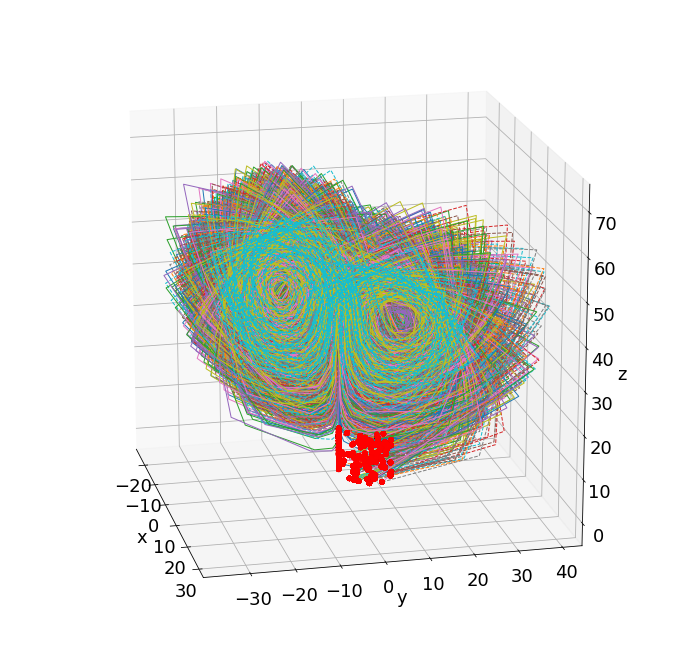

In [ ]:
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
  x, y, z = x_y_z
  return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

nn_flow_simulation = nn_flow[:,:,0:3]
x_t = np.array([integrate.odeint(lorenz_deriv, nn_flow_simulation[i, 0, :], t) for i in range(num_traj)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.zeros((len(t),num_traj))
y = np.zeros((len(t),num_traj))
z = np.zeros((len(t),num_traj))

xd = np.zeros((len(t),num_traj))
yd = np.zeros((len(t),num_traj))
zd = np.zeros((len(t),num_traj))



for j in range(num_traj):
    x[:,j], y[:,j], z[:,j] = x_t[j, :, :].T
    xd[:,j], yd[:,j], zd[:,j] = nn_flow[j, :, :-1].T
    ax.plot(x[:,j], y[:,j], z[:,j], linewidth=1)
    ax.plot(xd[:,j], yd[:,j], zd[:,j], '--', lw=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(x[0], y[0], z[0], color='r')
             
ax.view_init(18, -13)
plt.show()

Text(0, 0.5, 'z coordinate')

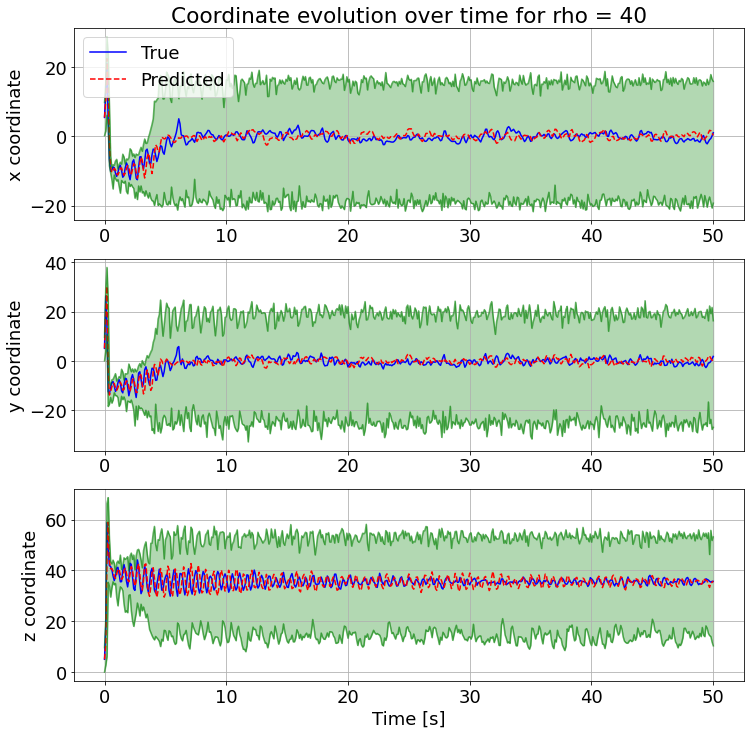

In [ ]:
x_mean = np.mean(x,axis=1)
y_mean = np.mean(y,axis=1)
z_mean = np.mean(z,axis=1)

xd_upper = np.percentile(xd,0.5,axis=1)
yd_upper = np.percentile(yd,0.5,axis=1)
zd_upper = np.percentile(zd,0.5,axis=1)

xd_lower = np.percentile(xd,95.5,axis=1)
yd_lower = np.percentile(yd,95.5,axis=1)
zd_lower = np.percentile(zd,95.5,axis=1)

xd_mean = np.mean(xd,axis=1)
yd_mean = np.mean(yd,axis=1)
zd_mean = np.mean(zd,axis=1)

fig, ax = plt.subplots(3,1)
ax[0].set_title('Coordinate evolution over time for rho = %d' %rho)
ax[0].plot(t,x_mean,'b')
ax[0].plot(t,xd_mean, 'r--')
ax[0].plot(t, xd_lower, 'g', alpha=0.6)
ax[0].plot(t, xd_upper, 'g', alpha=0.6)
ax[0].fill_between(t, xd_lower, xd_upper, color='g', alpha=0.3)
ax[0].grid() 
ax[0].set_ylabel('x coordinate')
ax[0].legend(['True','Predicted'])

ax[1].plot(t,y_mean,'b')
ax[1].plot(t,yd_mean, 'r--')
ax[1].plot(t, yd_lower, 'g', alpha=0.6)
ax[1].plot(t, yd_upper, 'g', alpha=0.6)
ax[1].fill_between(t, yd_lower, yd_upper, color='g', alpha=0.3)
ax[1].grid()
ax[1].set_ylabel('y coordinate')

ax[2].plot(t,z_mean,'b')
ax[2].plot(t,zd_mean, 'r--')
ax[2].plot(t, zd_lower, 'g', alpha=0.6)
ax[2].plot(t, zd_upper, 'g', alpha=0.6)
ax[2].fill_between(t, zd_lower, zd_upper, color='g', alpha=0.3)
ax[2].grid()
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('z coordinate')